In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [44]:
# Load datasets (replace with your actual file paths)
train_df = pd.read_csv('mnist_train.csv')  # Replace with your file path
test_df = pd.read_csv('mnist_test.csv')    # Replace with your file path

# Combine datasets
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
print("Combined Data Shape:", combined_df.shape)

# Check for NaNs in features and labels
print("NaNs in Combined Features:", combined_df.drop('label', axis=1).isna().sum().sum())
print("NaNs in Combined Labels:", combined_df['label'].isna().sum())

# Separate features and labels
X_combined = combined_df.drop('label', axis=1)
y_combined = combined_df['label']

Combined Data Shape: (464, 785)
NaNs in Combined Features: 177
NaNs in Combined Labels: 2


In [46]:
# Impute NaNs in labels (e.g., drop rows with NaN labels or impute with mode)
# Option 1: Drop rows with NaN labels (if few)
combined_df_clean = combined_df.dropna(subset=['label'])
print("Shape after dropping NaN labels:", combined_df_clean.shape)

# Option 2: Impute labels with mode (uncomment if preferred)
# label_imputer = SimpleImputer(strategy='most_frequent')
# y_combined = label_imputer.fit_transform(y_combined.values.reshape(-1, 1)).ravel()

# Update X and y after cleaning
X_combined = combined_df_clean.drop('label', axis=1)
y_combined = combined_df_clean['label']

# Preprocessing pipeline for features
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace NaNs in X with mean
    ('scaler', StandardScaler())                  # Standardize features
])

# Apply preprocessing to features
X_processed = preprocessing_pipeline.fit_transform(X_combined)

# Normalize (already scaled, but explicit for clarity)
X_processed = X_processed / 255.0

# Verify no NaNs
print("NaNs in Processed Features:", np.isnan(X_processed).sum())
print("NaNs in Processed Labels:", np.isnan(y_combined).sum())

Shape after dropping NaN labels: (462, 785)
NaNs in Processed Features: 0
NaNs in Processed Labels: 0


In [48]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=200)  # Select top 200 features
X_selected = selector.fit_transform(X_processed, y_combined)

# Get selected feature indices
selected_features = selector.get_support()
print("Number of Features Selected:", X_selected.shape[1])

Number of Features Selected: 200


In [50]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_combined, test_size=0.2, random_state=42, stratify=y_combined
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (369, 200)
Testing Set Shape: (93, 200)


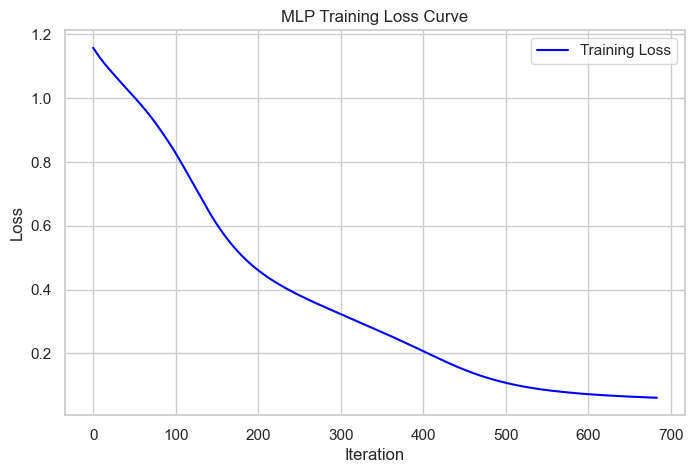

In [14]:
# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_, label='Training Loss', color='blue')
plt.title("MLP Training Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
results = {}

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
results['Logistic Regression'] = accuracy_score(y_test, lr_pred)

# 2. SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
results['SVM'] = accuracy_score(y_test, svm_pred)

# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, rf_pred)

# 4. HistGradientBoostingClassifier
hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(X_train, y_train)
hgb_pred = hgb_model.predict(X_test)
results['HistGradientBoosting'] = accuracy_score(y_test, hgb_pred)


--- Logistic Regression Evaluation ---
Accuracy: 0.13978494623655913
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.14      1.00      0.25        13
         2.0       0.00      0.00      0.00         9
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00        11
         5.0       0.00      0.00      0.00         8
         6.0       0.00      0.00      0.00         8
         7.0       0.00      0.00      0.00        10
         8.0       0.00      0.00      0.00         6
         9.0       0.00      0.00      0.00        10

    accuracy                           0.14        93
   macro avg       0.01      0.10      0.02        93
weighted avg       0.02      0.14      0.03        93



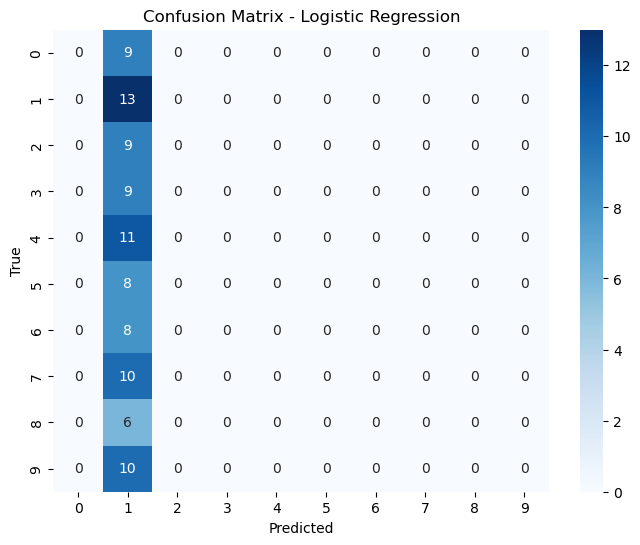


--- SVM Evaluation ---
Accuracy: 0.9354838709677419
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        13
         2.0       1.00      0.89      0.94         9
         3.0       0.90      1.00      0.95         9
         4.0       0.77      0.91      0.83        11
         5.0       1.00      0.88      0.93         8
         6.0       0.88      0.88      0.88         8
         7.0       0.91      1.00      0.95        10
         8.0       1.00      1.00      1.00         6
         9.0       1.00      0.80      0.89        10

    accuracy                           0.94        93
   macro avg       0.95      0.93      0.94        93
weighted avg       0.94      0.94      0.94        93



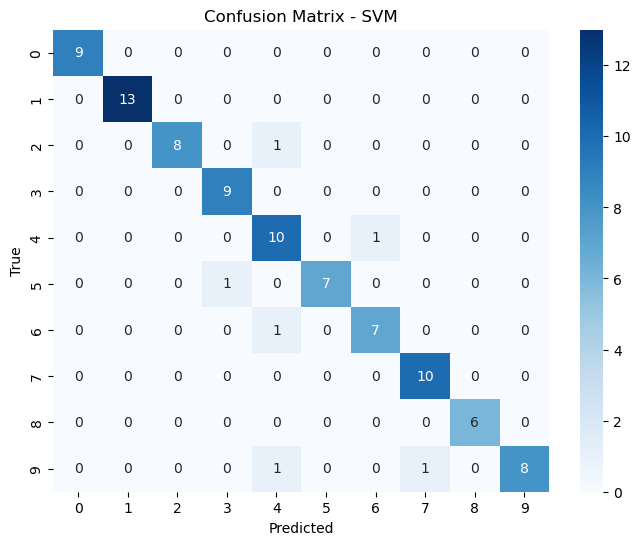


--- Random Forest Evaluation ---
Accuracy: 0.8709677419354839
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90         9
         1.0       0.81      1.00      0.90        13
         2.0       1.00      0.67      0.80         9
         3.0       0.78      0.78      0.78         9
         4.0       0.71      0.91      0.80        11
         5.0       1.00      0.75      0.86         8
         6.0       1.00      0.88      0.93         8
         7.0       1.00      1.00      1.00        10
         8.0       1.00      0.83      0.91         6
         9.0       0.89      0.80      0.84        10

    accuracy                           0.87        93
   macro avg       0.90      0.86      0.87        93
weighted avg       0.89      0.87      0.87        93



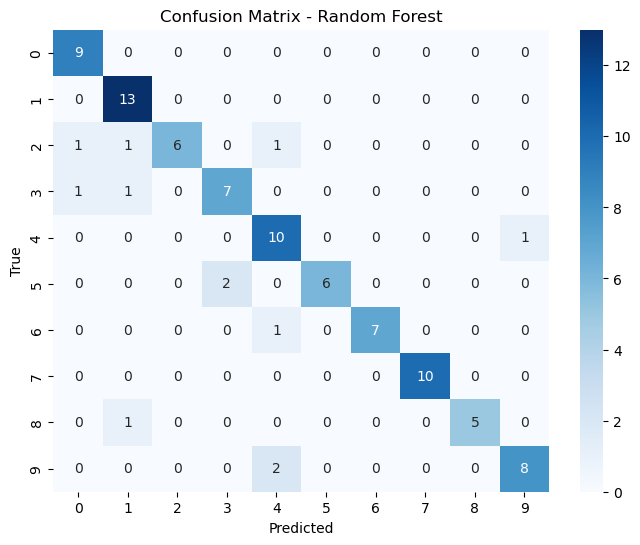


--- HistGradientBoosting Evaluation ---
Accuracy: 0.8817204301075269
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89         9
         1.0       0.93      1.00      0.96        13
         2.0       0.80      0.89      0.84         9
         3.0       1.00      0.89      0.94         9
         4.0       0.73      0.73      0.73        11
         5.0       1.00      1.00      1.00         8
         6.0       0.67      0.75      0.71         8
         7.0       1.00      0.90      0.95        10
         8.0       1.00      1.00      1.00         6
         9.0       0.89      0.80      0.84        10

    accuracy                           0.88        93
   macro avg       0.89      0.88      0.89        93
weighted avg       0.89      0.88      0.88        93



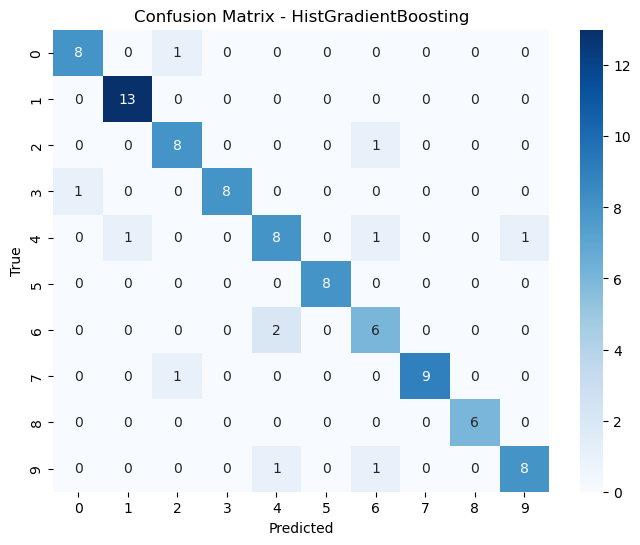

In [58]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, svm_pred, "SVM")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, hgb_pred, "HistGradientBoosting")

Best HistGradientBoosting Parameters: {'learning_rate': 0.1, 'max_iter': 100}

--- Tuned HistGradientBoosting Evaluation ---
Accuracy: 0.8817204301075269
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89         9
         1.0       0.93      1.00      0.96        13
         2.0       0.80      0.89      0.84         9
         3.0       1.00      0.89      0.94         9
         4.0       0.73      0.73      0.73        11
         5.0       1.00      1.00      1.00         8
         6.0       0.67      0.75      0.71         8
         7.0       1.00      0.90      0.95        10
         8.0       1.00      1.00      1.00         6
         9.0       0.89      0.80      0.84        10

    accuracy                           0.88        93
   macro avg       0.89      0.88      0.89        93
weighted avg       0.89      0.88      0.88        93



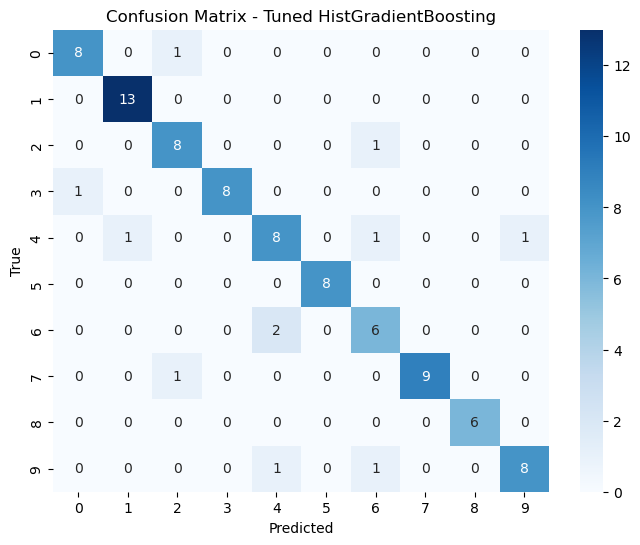

In [60]:
param_grid = {
    'max_iter': [100, 200],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(HistGradientBoostingClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train[:5000], y_train[:5000])  # Subset for speed
best_hgb = grid_search.best_estimator_
hgb_tuned_pred = best_hgb.predict(X_test)
results['Tuned HistGradientBoosting'] = accuracy_score(y_test, hgb_tuned_pred)

print("Best HistGradientBoosting Parameters:", grid_search.best_params_)
evaluate_model(y_test, hgb_tuned_pred, "Tuned HistGradientBoosting")

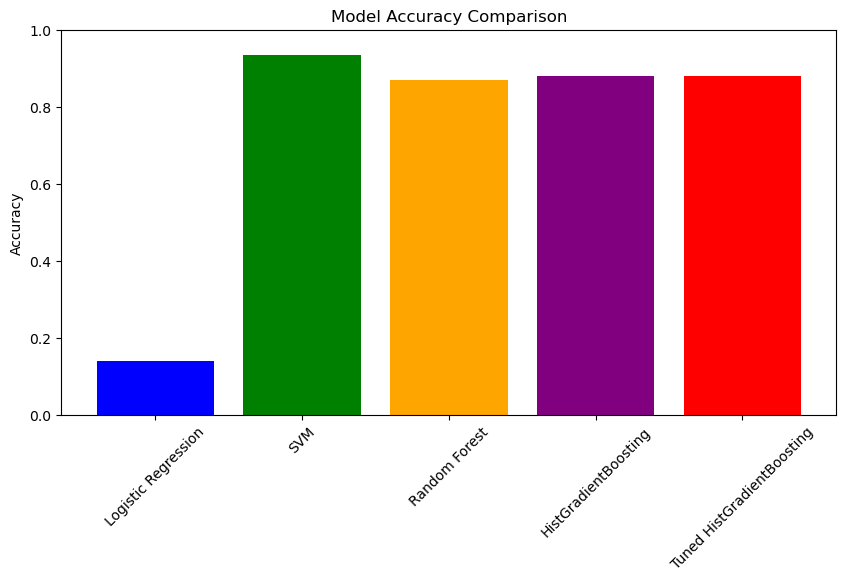

In [61]:
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()